**Problem** bir ml projesi ile bir sitenin ürün önerme sistemi yeniden ağılandırılıyor 
ve eski sitem ile yeni sistemin farkllı olup olmadıgı test edilmek isteniyor

**Problem** bir ml projesi ile bir sitenin ürün önerme sistemi yeniden ağılandırılıyor 
ve eski sitem ile yeni sistemin farkllı olup olmadıgı test edilmek isteniyor

**Detaylar**

model web sitesine entegre edilmiş

site kullanıcıları bir kurala göre 2 ye bölünmüş

A grubu eski B grubu yeni sistem

Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

H0: M1 = M2 

H1: M1 != M2

In [7]:
import pandas as pd
import numpy as np
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


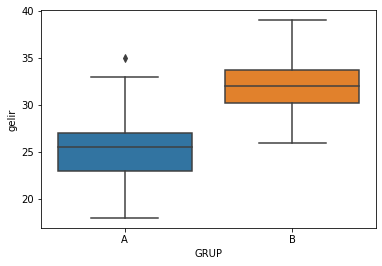

In [26]:
import seaborn as sns
sns.boxplot(x="GRUP", y="gelir",data=AB);

**B** grubu daha yukarıda gözüküyor. E belki tesadüüüf. HEMEN KONTROL EDELİM...


**Varsayım konrolü:**

In [28]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [29]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [31]:
#normallik varsayımı

In [2]:
from scipy.stats import shapiro

In [43]:
shapiro(A_B.A) #A_B veri setimizden A'yı çekip normallik testimizi yaptık. ve >0,05 çıktı

(0.9789242148399353, 0.7962799668312073)

In [44]:
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [45]:
#burada da >0,05 çıktı.

In [46]:
#ŞİMDİİİ gelelim varyans homojenliği varsayımına...

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [51]:
from scipy import stats
stats.levene(A_B.A, A_B.B)


LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [53]:
#LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569) şeklinde,
#yani reddedilemez. 
#Yani varyans homojenliği varsayımı da sağlandı. şimi T testi uygulayalım...


#Zaten T testi çalıştırmak 1 2 parça kod. Zor olan "öncesi..."

In [54]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [ ]:
# p-value=0,05 ten küçük olduğundan farklılık vardır denir ve reddedilir. 

In [55]:
testIst,Value=stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)
print("Test istatistiği = %.4f, P-Value= %.4f"%(testIst,Value))

Test istatistiği = -7.0287, P-Value= 0.0000


In [56]:
#anlamlı bir fark oldugu sonucuna vardık ve 2. durumun lehine bir farktır.

**Varsayalımki varsayım testlerimizin sonucu negatif oldu.**

In [58]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [ ]:
#bu senaryodada fark vardır sonucuna varıldı